In [29]:
import os
import sys
sys.path.append(os.path.abspath('../head_detect'))
sys.path.append(os.path.abspath('../code'))
sys.path.append(os.path.abspath('../tools'))

import numpy as np
from frameROI import FrameROI as  fr
from vgg_face import VGGface 
from face_detector1 import FaceDetector 
from facedetector_evaluation import videoDetectorEvaluation , Video2Frame

from predict import HeadDetector 

rawimg= '../data/'#'../data/test2.jpg'#videoframe/5695231002474224804_veg300_20.jpg'
saveto= '../data/model_evaluation2'



In [34]:
sys.path

['..',
 '..',
 '/Users/gaojiejun/Sheffield/_06_Industrial_teamProject(COM6911)/Code',
 '/Users/gaojiejun/anaconda3/lib/python37.zip',
 '/Users/gaojiejun/anaconda3/lib/python3.7',
 '/Users/gaojiejun/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/gaojiejun/.local/lib/python3.7/site-packages',
 '/Users/gaojiejun/anaconda3/lib/python3.7/site-packages',
 '/Users/gaojiejun/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/gaojiejun/anaconda3/lib/python3.7/site-packages/IMDbPY-6.8-py3.7.egg',
 '/Users/gaojiejun/.local/lib/python3.7/site-packages/IPython/extensions',
 '/Users/gaojiejun/.ipython',
 '/Users/gaojiejun/Sheffield/_06_Industrial_teamProject(COM6911)/head_detector',
 '/Users/gaojiejun/Sheffield/_06_Industrial_teamProject(COM6911)/head_detect',
 '/Users/gaojiejun/Sheffield/_06_Industrial_teamProject(COM6911)/head_detect',
 '/Users/gaojiejun/Sheffield/_06_Industrial_teamProject(COM6911)/head_detect',
 '/Users/gaojiejun/Sheffield/_06_Industrial_teamProject(COM6911)/head_detect

In [33]:
print(os.getcwd())
cd ../head_detect/
print(os.getcwd())


SyntaxError: invalid syntax (<ipython-input-33-f950447d735a>, line 2)

In [30]:
hd = HeadDetector()

hd.detect_head(rawimg, exportImg=False, outputpath = "./output/")

FileNotFoundError: [Errno 2] No such file or directory: 'config.json'

In [112]:

#model= VGGface.detect_roi_fromRawImg#, 
model= FaceDetector.detect_cv2dnn_fromRawImg_conf7 
#------------------------------------------------------------------------------

annotations = model(rawimg) # input rawimage, and return 2d numpy.array [[x,y,w,h]]
print(annotations)

# #create a relative labels for the annotation
# labels= np.zeros(annotations.shape[0])
# print(labels)

[[131 172  78  97]
 [457 147  62  93]
 [ 64 175  66  81]
 [356 136  48  64]
 [585 251  76 117]
 [244 179  64  86]
 [316  90  43  51]
 [114  55  57  63]
 [346 272  56  94]
 [ 52  57  46  53]
 [201 100  48  52]
 [568 171  27  35]
 [523 192  27  31]]


In [111]:


#------------------------------------------------------------------------------
# annotate face boundingbox and save
ROI=fr(rawimg, annotations=annotations, labels=labels , saveto_directory=saveto )
ROI.createROIs(crop=0, 
               save=1,
               boundingbox_color=(255,255,0))
#------------------------------------------------------------------------------
# #evaluation 
video='../data/5695231002474224804_veg301.wmv'
annotation_txt= '../data/5695231002474224804_veg301_gt.txt'

vd= Video2Frame(video, saveframe=0, savedir= '../data/model_evaluation2/eva')
vdE= videoDetectorEvaluation([VGGface.detect_roi_fromRawImg, 
                              FaceDetector.detect_cv2dnn_fromRawImg,
                              FaceDetector.detect_cv2dnn_fromRawImg_conf7,
                              FaceDetector.detect_cv2dnn_fromRawImg_conf3
                              ], video,annotation_txt,
                             save= 1, savedir= vd.savedir)

print(vdE.eva)

13 rois have been annotated
model: 0 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 40.87665104866028s
model: 1 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 11.247712135314941s
model: 2 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 11.511173009872437s
model: 3 ..
     frame 0 ..
     frame 20 ..
     frame 40 ..
     frame 60 ..
cost time 11.737065076828003s
[(0, <function VGGface.detect_roi_fromRawImg at 0x1243617b8>, 40.87665104866028, 0.7067499644120284, 0.9388532664470891), (1, <function FaceDetector.detect_cv2dnn_fromRawImg at 0x14c9da950>, 11.247712135314941, 0.8275655706293916, 0.9424905839759988), (2, <function FaceDetector.detect_cv2dnn_fromRawImg_conf7 at 0x14c9da840>, 11.511173009872437, 0.7478206514671265, 0.9702483676398528), (3, <function FaceDetector.detect_cv2dnn_fromRawImg_conf3 at 0x14c9da8c8>, 11.737065076828003, 0.8702341383063233, 0.9264102398746945)]


In [8]:
import pandas as pd

In [105]:
eva= pd.DataFrame(vdE.eva, columns=['idx', 'model','timecost', 'recall','precision'])

In [106]:

import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

def bar_graph( ds, plotname='Time consumed per frame', colors='salmon'):
    my_colrs= colors
    if len(colors)==1 : my_colrs = colors* (len(ds))
    index = np.arange( len(ds))
    plt.bar(index, ds['timecost']/vdE.vf.frame_num ,width=1/2, color= my_colrs)
#     plt.bar(index, ds['recall'], color= 'green')
    plt.xlabel('models', fontsize=10)
    plt.ylabel('time/s/frame', fontsize=10)
    plt.xticks(index, ds['idx'].astype(int), fontsize=10, rotation=0,ha="right")
#     plt.ylim(0 , 0.3)#  
    plt.title(plotname+'\n')
    plt.show()

def bar_group(ds, plotname='Face detection model evaluation'):
    '''
    plot a grouped bar chart
    '''
    # set width of bar
    barWidth = 1/3   # if group of n, then the barWidth = 1/(n+1)

    # set height of bar
    bars1 = ds['recall']
    bars2 = ds['precision']

    # Set position of bar on X axis
    r1 = np.arange(len(ds))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    plt.bar(r1, bars1, color='salmon', width=barWidth, edgecolor='white', label='recall')
    plt.bar(r2, bars2, color='lightseagreen', width=barWidth, edgecolor='white', label='precision')

    # Add xticks on the middle of the group bars
    plt.xlabel('model', fontsize=10)
    plt.ylabel('', fontsize=10)
    plt.xticks(ticks= [r + (0.5-barWidth) for r in range(len(bars1))], labels=ds['idx'],fontsize=10, rotation=0,ha="right")
    # Create legend & Show graphic
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(plotname+'\n')
    plt.show()

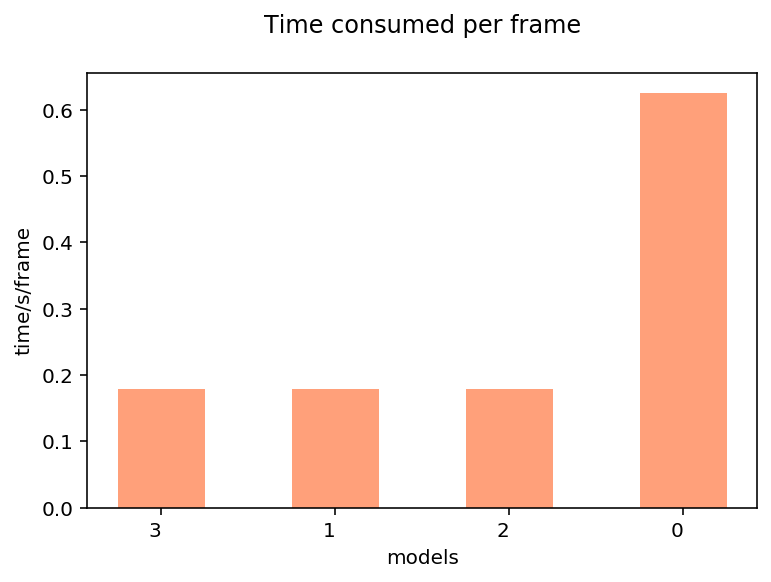

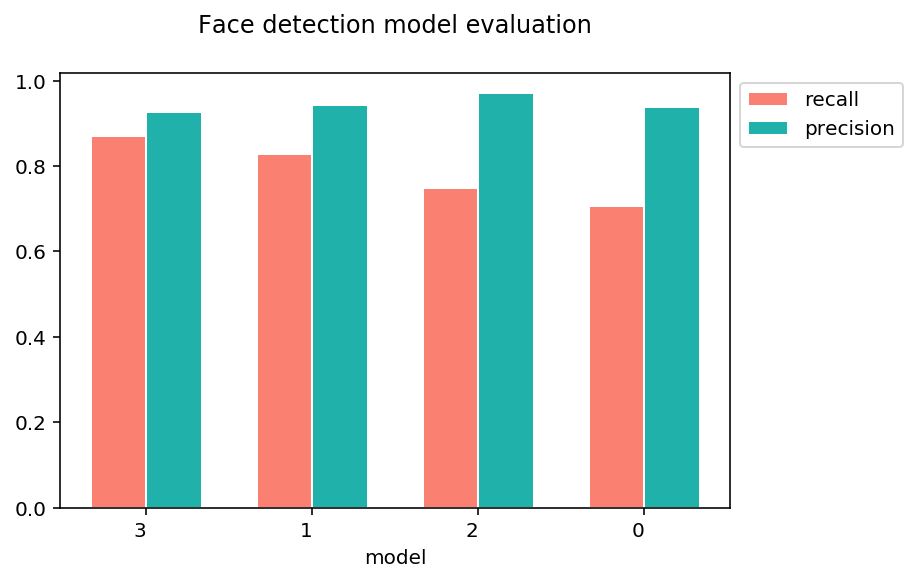

,idx,model,timecost,recall,precision
3,3,<function FaceDetector.detect_cv2dnn_fromRawIm...,10.939523,0.870234,0.926410
1,1,<function FaceDetector.detect_cv2dnn_fromRawIm...,10.945649,0.827566,0.942491
2,2,<function FaceDetector.detect_cv2dnn_fromRawIm...,10.940663,0.747821,0.970248
0,0,<function VGGface.detect_roi_fromRawImg at 0x1...,38.092030,0.706750,0.938853


In [108]:


ds= eva.sort_values(['recall', 'precision'], ascending=[False, True])
bar_graph(ds, colors= ['lightsalmon'])
bar_group(ds) 
ds

### Evaluation:

Before we start, a bit explanation about the recall and precision metrics. We all familiar with those two in the classification model evaluation. Likewise, we use 
- __recall__ to represent the rate that how many ground truth(manual annotation) head/faces are detected, 
- __precision__ to indicate how accurate that detected faces/heads are mannual annotated (=how much area of the detected faces/heads are included in the groundtruth bondingbox).

As shown in the above charts,

- Firstly, amongst the models we have, the VGG models(model0) is the most inefficient with 0.6 seconds per frame, compared to a average less than 0.2seconds per frame. 
- Secondly, Regarding the time cost, there is a trade off between recall and precision: the better the recall, the worse the precision. 

However, I think the recall should be preoritised given our ground truth are correct (99%+), because __when it is a false detected face, it wouldnot have a label, or definitely "non-active". it also would not affect too much to our model training. On the contrary, if we miss a acctually active speaker, then it can make a big difference to the training__. So, given the precision is considerable level( maybe >=90%), choose the highest recall model. 

As a conclusion, amongst the models, the best model is model3. 



